**E01: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?**

### Creating a dataset 

In [7]:
import re

In [9]:
words = open('names.txt', 'r').read().splitlines()
words2 = open('IN.txt', 'r').read().splitlines()
words = words + words2
words.remove('lllllllllllllllllll') # removing this word
words = [word for word in words if re.match("^[a-zA-Z]+$", word)] # removing all the words containing special characters

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [27]:
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [13]:
len(words)

38499

In [15]:
import torch

In [19]:
xs, ys = [], []
for w in words[:1]: 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        print(ch1, ch2, '->', ch3)
        xs.append((ix1, ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e -> m
e m -> m
m m -> a
m a -> .


In [23]:
xs, ys

(tensor([[ 0,  5],
         [ 5, 13],
         [13, 13],
         [13,  1]]),
 tensor([13, 13,  1,  0]))

### One hot Encoding

In [30]:
import torch.nn.functional as F

In [34]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc = xenc.max(dim=1)[0]
xenc

tensor([[1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
xenc.shape

torch.Size([4, 27])

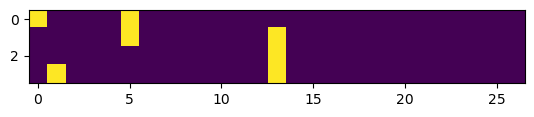

In [40]:
import matplotlib.pyplot as plt
plt.imshow(xenc)

#### Weight initialization for 27 neurons

In [43]:
W = torch.randn((27, 27))
W

tensor([[-1.3012e+00,  1.7507e+00,  5.6962e-01,  1.8759e-01,  9.7085e-01,
          8.2543e-01,  1.3337e+00, -1.3809e-01,  2.0006e+00, -1.1917e+00,
          1.3436e+00,  8.0126e-01,  1.1799e+00,  6.3047e-01,  1.1622e+00,
         -1.3341e+00,  2.3321e-01, -1.9661e+00,  4.5655e-01, -2.3403e-01,
          7.5752e-01, -7.3300e-01,  1.8590e-01,  6.8520e-01, -2.3302e+00,
         -4.8773e-01, -7.0939e-01],
        [ 5.7711e-01, -1.4682e-01, -1.0297e+00, -5.5593e-02,  2.3374e-02,
         -3.0376e-01,  1.2723e+00,  2.9948e-01,  2.7313e-01,  8.2372e-01,
          4.6045e-01, -1.5518e+00, -5.4083e-01, -2.8017e-02,  1.5511e-01,
         -1.0798e+00, -3.6466e-01, -7.7743e-02,  2.4754e+00, -4.8193e-01,
         -1.8686e-01,  6.9767e-02,  3.2159e+00,  1.5740e+00,  3.5183e-01,
          1.7567e-01, -5.5759e-01],
        [-1.1710e+00,  6.6202e-01,  1.7278e+00,  1.0368e+00,  3.0283e-01,
         -3.1877e-02, -3.3648e-01, -9.8572e-01,  5.6985e-01, -2.3764e+00,
         -1.6078e-01,  2.6172e-01, -1.20

In [47]:
(xenc @ W)

tensor([[-0.6659,  0.6186,  1.7018,  0.2031,  1.7757, -0.7372,  2.6915, -1.8703,
          2.4103, -2.8367,  1.8402,  2.0008,  2.0564,  0.8678,  0.1649, -1.8017,
          0.2033, -2.0923, -0.6935, -0.2684, -0.1026, -0.3235,  0.2046,  1.0421,
         -1.5035, -0.7610, -0.9097],
        [-1.6101, -1.8649,  0.3281, -1.6570,  0.5758, -3.4028,  2.0779, -2.2507,
          0.4833, -2.0216,  0.6383,  1.5251,  0.6877,  0.6002, -1.2198, -0.5324,
          0.0722, -2.2327, -0.5747,  1.3373, -0.4742, -0.2726,  1.4621,  2.0907,
          1.6999, -1.6571, -1.1861],
        [-2.2453, -0.7328, -0.8041, -1.6725, -0.2290, -1.8402,  0.7201, -0.5185,
          0.0736, -0.3766,  0.1417,  0.3255, -0.1888,  0.3628, -0.2226, -0.0649,
          0.1020, -2.1066,  0.5754,  1.3716,  0.3859, -0.6821,  1.4435,  1.7339,
          0.8732, -1.3839, -0.9858],
        [-1.6682, -0.8796, -1.8338, -1.7281, -0.2056, -2.1440,  1.9923, -0.2190,
          0.3467,  0.4471,  0.6021, -1.2263, -0.7297,  0.3348, -0.0675, -1.1447

In [51]:
((xenc @ W).exp())

tensor([[5.1379e-01, 1.8564e+00, 5.4839e+00, 1.2252e+00, 5.9042e+00, 4.7847e-01,
         1.4753e+01, 1.5407e-01, 1.1137e+01, 5.8616e-02, 6.2977e+00, 7.3950e+00,
         7.8179e+00, 2.3817e+00, 1.1793e+00, 1.6503e-01, 1.2255e+00, 1.2341e-01,
         4.9980e-01, 7.6463e-01, 9.0250e-01, 7.2364e-01, 1.2270e+00, 2.8350e+00,
         2.2236e-01, 4.6721e-01, 4.0263e-01],
        [1.9987e-01, 1.5492e-01, 1.3883e+00, 1.9071e-01, 1.7786e+00, 3.3280e-02,
         7.9874e+00, 1.0532e-01, 1.6214e+00, 1.3244e-01, 1.8932e+00, 4.5954e+00,
         1.9891e+00, 1.8225e+00, 2.9528e-01, 5.8718e-01, 1.0748e+00, 1.0724e-01,
         5.6289e-01, 3.8087e+00, 6.2241e-01, 7.6141e-01, 4.3152e+00, 8.0906e+00,
         5.4736e+00, 1.9068e-01, 3.0540e-01],
        [1.0589e-01, 4.8055e-01, 4.4747e-01, 1.8777e-01, 7.9532e-01, 1.5879e-01,
         2.0546e+00, 5.9542e-01, 1.0764e+00, 6.8620e-01, 1.1522e+00, 1.3847e+00,
         8.2793e-01, 1.4374e+00, 8.0043e-01, 9.3717e-01, 1.1074e+00, 1.2166e-01,
         1.7779e+

In [53]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent to N matrix.
probs = counts / counts.sum(1, keepdims=True) # normalize to get the probabilities
probs


tensor([[0.0067, 0.0244, 0.0720, 0.0161, 0.0775, 0.0063, 0.1936, 0.0020, 0.1462,
         0.0008, 0.0827, 0.0971, 0.1026, 0.0313, 0.0155, 0.0022, 0.0161, 0.0016,
         0.0066, 0.0100, 0.0118, 0.0095, 0.0161, 0.0372, 0.0029, 0.0061, 0.0053],
        [0.0040, 0.0031, 0.0277, 0.0038, 0.0355, 0.0007, 0.1595, 0.0021, 0.0324,
         0.0026, 0.0378, 0.0917, 0.0397, 0.0364, 0.0059, 0.0117, 0.0215, 0.0021,
         0.0112, 0.0760, 0.0124, 0.0152, 0.0862, 0.1615, 0.1093, 0.0038, 0.0061],
        [0.0030, 0.0137, 0.0128, 0.0054, 0.0227, 0.0045, 0.0588, 0.0170, 0.0308,
         0.0196, 0.0329, 0.0396, 0.0237, 0.0411, 0.0229, 0.0268, 0.0317, 0.0035,
         0.0508, 0.1127, 0.0421, 0.0145, 0.1211, 0.1619, 0.0685, 0.0072, 0.0107],
        [0.0010, 0.0023, 0.0009, 0.0010, 0.0045, 0.0006, 0.0405, 0.0044, 0.0078,
         0.0086, 0.0101, 0.0016, 0.0027, 0.0077, 0.0052, 0.0018, 0.0042, 0.0006,
         0.1166, 0.0134, 0.0067, 0.0030, 0.5824, 0.1508, 0.0188, 0.0016, 0.0012]])

In [55]:
probs.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000])

In [57]:
# SUMMARY ---------------------------->>
xs

tensor([[ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])

In [59]:
ys

tensor([13, 13,  1,  0])

In [61]:
# randomly initialize 27 neurons weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [63]:
xenc = F.one_hot(xs, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [65]:
probs.shape

torch.Size([4, 27])

#### Loss Calculation

In [91]:
nlls = torch.zeros(4)
for i in range(4):
    # i-th trigram:
    x = xs[i] # input character index
    y = ys[i].item() # label character index 
    print('-------')
    print(f'Trigram example {i+1}: {itos[x[0].item()]}{itos[x[1].item()]} -> {itos[y]} (indexes {x},{y})')  
    print('input to the neural net:', x)
    print('output prob from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned to the net to the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll
print('=============')
print('average negative log likelihood, i.e. loss = ', nlls.mean().item())
    
    
    

-------
Trigram example 1: .e -> m (indexes tensor([0, 5]),13)
input to the neural net: tensor([0, 5])
output prob from the neural net: tensor([0.0553, 0.0250, 0.0096, 0.0069, 0.1052, 0.0111, 0.0008, 0.0244, 0.0042,
        0.0296, 0.0174, 0.0200, 0.0033, 0.0047, 0.0170, 0.2354, 0.0551, 0.0004,
        0.0717, 0.0037, 0.0517, 0.0103, 0.0045, 0.0017, 0.0044, 0.0104, 0.2165])
label (actual next character): 13
probability assigned to the net to the correct character: 0.004655060824006796
log likelihood: -5.369800090789795
negative log likelihood: 5.369800090789795
-------
Trigram example 2: em -> m (indexes tensor([ 5, 13]),13)
input to the neural net: tensor([ 5, 13])
output prob from the neural net: tensor([0.0216, 0.1402, 0.0287, 0.0414, 0.3203, 0.0138, 0.0059, 0.0200, 0.0284,
        0.0118, 0.0125, 0.0431, 0.0036, 0.0115, 0.0038, 0.0085, 0.0406, 0.0013,
        0.1423, 0.0030, 0.0241, 0.0056, 0.0159, 0.0013, 0.0339, 0.0024, 0.0143])
label (actual next character): 13
probability assig

#### OPTIMIZATION

In [94]:
xs

tensor([[ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])

In [96]:
ys

tensor([13, 13,  1,  0])

In [98]:
# randomly initialize 27 neurons' weights. each neuron recieves 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [100]:
xenc = F.one_hot(xs, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(4), ys].log().mean()
loss

tensor(4.2061, grad_fn=<NegBackward0>)

In [102]:
# backward pass
W.grad = None 
loss.backward()

In [104]:
W.grad

tensor([[ 1.3814e-02,  6.2439e-03,  2.4014e-03,  1.7229e-03,  2.6312e-02,
          2.7859e-03,  1.9837e-04,  6.0949e-03,  1.0440e-03,  7.3938e-03,
          4.3535e-03,  4.9889e-03,  8.2009e-04, -2.4884e-01,  4.2515e-03,
          5.8851e-02,  1.3767e-02,  8.8321e-05,  1.7922e-02,  9.2083e-04,
          1.2927e-02,  2.5706e-03,  1.1346e-03,  4.1811e-04,  1.0916e-03,
          2.6035e-03,  5.4117e-02],
        [-2.4688e-01,  4.2585e-03,  1.2841e-02,  2.2276e-03,  2.7310e-02,
          4.1294e-03,  1.9102e-02,  2.1880e-03,  1.0250e-02,  5.2745e-04,
          5.1212e-03,  4.5357e-03,  8.6560e-03,  1.9911e-03,  2.2811e-03,
          1.5540e-03,  1.5967e-02,  6.3022e-04,  3.9087e-02,  2.0691e-03,
          6.4308e-03,  1.6218e-03,  4.5595e-04,  4.4713e-03,  5.2640e-02,
          1.5757e-02,  7.7249e-04],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
          0.0000e+00,  0.0000e+00,  0.00

In [106]:
W.shape

torch.Size([27, 27])

In [108]:
W.grad.shape

torch.Size([27, 27])

In [110]:
W.data += -0.1 * W.grad

In [112]:
xenc = F.one_hot(xs, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(4), ys].log().mean()
loss

tensor(4.1463, grad_fn=<NegBackward0>)

In [326]:
# backward pass
W.grad = None #set to zero the gradient
loss.backward()
W.data += -0.1 * W.grad

In [328]:
xenc = F.one_hot(xs, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(4), ys].log().mean()
loss

tensor(1.5585, grad_fn=<NegBackward0>)

Look loss is decreasing....

In [331]:
# __________ !!! Optimization !!! yay, but this time actually _________________

In [396]:
xs, ys = [], []
for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1, ix2))
        ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  474384


In [466]:
# Gradient Descent
for k in range(200):
    xenc = F.one_hot(xs, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(xs.shape[0]), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    
    loss.backward()
    # update
    
    W.data += -6 * W.grad

2.4496638774871826
2.4496517181396484
2.4496397972106934
2.4496278762817383
2.449615955352783
2.449603796005249
2.449592113494873
2.449579954147339
2.449568271636963
2.449556350708008
2.449544668197632
2.4495327472686768
2.4495208263397217
2.4495091438293457
2.449497699737549
2.449486017227173
2.449474573135376
2.449462413787842
2.449450969696045
2.449439525604248
2.449427843093872
2.449416399002075
2.4494049549102783
2.4493935108184814
2.4493823051452637
2.4493706226348877
2.44935941696167
2.449347972869873
2.4493367671966553
2.4493253231048584
2.4493143558502197
2.4493026733398438
2.449291706085205
2.4492805004119873
2.4492692947387695
2.4492580890655518
2.449247121810913
2.4492359161376953
2.4492249488830566
2.449213981628418
2.4492030143737793
2.4491920471191406
2.449180841445923
2.4491701126098633
2.4491593837738037
2.449148178100586
2.4491374492645264
2.449126720428467
2.4491162300109863
2.4491050243377686
2.449094533920288
2.4490833282470703
2.44907283782959
2.4490621089935303
2

### Prediction

In [473]:
# Finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):  # Generate 5 words
    out = []
    ix1, ix2 = 0, 0  # Start with two dots (start tokens)

    while True:
        # Create one-hot encoding of both indices and merge them
        xenc = F.one_hot(torch.tensor([[ix1, ix2]]), num_classes=27).float().max(dim=1)[0]

        # Predict log-counts
        logits = xenc @ W

        # Convert logits to probabilities
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        # Sample the next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

        out.append(itos[ix])  # Convert index to character

        if ix == 0:  # Stop if end token is reached
            break

        # Shift indices: new pair is (previous ix2, new ix)
        ix1, ix2 = ix2, ix

    print(''.join(out))


uunide.
ianaaad.
ulelay.
ainna.
ui.


#### Some tweeks in the model 

In [476]:
# Step 1: Increase Model Capacity
# Change W from (27,27) to (27*27, 27) to capture trigram relationships better
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27 * 27, 27), generator=g, requires_grad=True)


In [510]:
for k in range(20):
    xenc = F.one_hot(xs[:, 0] * 27 + xs[:, 1], num_classes=27*27).float()  # Encode as a single index
    logits = xenc @ W  # Predict log-counts
    counts = logits.exp()  # Counts, equivalent to N
    probs = counts / (counts.sum(1, keepdims=True) + 1e-6) # for numerical stability
    loss = -probs[torch.arange(xs.shape[0]), ys].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()
    # update
    W.data += -40 * W.grad

2.2990212440490723
2.2985565662384033
2.2980945110321045
2.2976348400115967
2.297178030014038
2.2967238426208496
2.296271800994873
2.2958223819732666
2.295375347137451
2.2949306964874268
2.2944886684417725
2.294049024581909
2.293611526489258
2.2931764125823975
2.2927439212799072
2.292313575744629
2.2918856143951416
2.291459560394287
2.2910358905792236
2.2906150817871094


In [522]:
 # Prediction using the trained model
g = torch.Generator().manual_seed(2147483647+5)

for i in range(5):  # Generate 5 words
    out = []
    ix1, ix2 = 0, 0  # Start with two dots (start tokens)

    while True:
        # Encode (ix1, ix2) into a single index
        idx = ix1 * 27 + ix2
        xenc = F.one_hot(torch.tensor([idx]), num_classes=27*27).float()

        # Predict log-counts
        logits = xenc @ W

        # Convert logits to probabilities
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        # Sample the next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

        out.append(itos[ix])  # Convert index to character

        if ix == 0:  # Stop if end token is reached
            break

        # Shift indices: new pair is (previous ix2, new ix)
        ix1, ix2 = ix2, ix

    print(''.join(out))

cari.
daming.
cwdms.
vi.
daraisccdcselen.


**E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?**

In [529]:
xs, ys

(tensor([[ 0,  5],
         [ 5, 13],
         [13, 13],
         ...,
         [21, 22],
         [22,  5],
         [ 5,  2]]),
 tensor([13, 13,  1,  ...,  5,  2,  0]))

In [531]:
from sklearn.model_selection import train_test_split

In [533]:
X_train , X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.1, random_state=42)

In [535]:
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [537]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [712]:
# Gradient Descent
for k in range(20):
    xenc = F.one_hot(X_train, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(X_train.shape[0]), y_train].log().mean()
    print(loss.item())

    # backward pass
    W.grad = None
    
    loss.backward()
    # update
    
    W.data += -15 * W.grad

2.442227602005005
2.4422271251678467
2.4422261714935303
2.442225456237793
2.4422247409820557
2.4422240257263184
2.442223310470581
2.4422225952148438
2.4422218799591064
2.442221164703369
2.442220449447632
2.4422194957733154
2.44221830368042
2.4422178268432617
2.4422173500061035
2.442216396331787
2.442215919494629
2.4422149658203125
2.442214250564575
2.442213296890259


In [714]:
train_error = 2.442213296890259

In [720]:
xenc = F.one_hot(X_dev, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(X_dev.shape[0]), y_dev].log().mean()
print(loss.item())

2.44336199760437


In [722]:
dev_error = 2.44336199760437

In [724]:
xenc = F.one_hot(X_test, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(X_test.shape[0]), y_test].log().mean()
print(loss.item())

2.4483754634857178


In [726]:
test_error = 2.4483754634857178

**E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?** 

In [729]:
reg_strengths = [0.0001, 0.001, 0.01, 0.1, 1] 
results = []
for reg_lambda in reg_strengths:
    W = torch.randn((27, 27), generator=g, requires_grad=True)  # Reinitialize W

    for k in range(1000):  # Training loop
        xenc = F.one_hot(X_train, num_classes=27).float().max(dim=1)[0]
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)

        loss = -probs[torch.arange(X_train.shape[0]), y_train].log().mean() + reg_lambda * (W**2).sum()

        W.grad = None
        loss.backward()
        W.data += -6 * W.grad

    # Compute final loss on dev set
    xenc_dev = F.one_hot(X_dev, num_classes=27).float().max(dim=1)[0]
    logits_dev = xenc_dev @ W
    counts_dev = logits_dev.exp()
    probs_dev = counts_dev / counts_dev.sum(1, keepdims=True)
    dev_loss = -probs_dev[torch.arange(X_dev.shape[0]), y_dev].log().mean().item()

    results.append((reg_lambda, dev_loss))
    print(f"Reg: {reg_lambda}, Dev Loss: {dev_loss}")



Reg: 0.0001, Dev Loss: 2.4593379497528076
Reg: 0.001, Dev Loss: 2.546643018722534
Reg: 0.01, Dev Loss: 2.8563008308410645
Reg: 0.1, Dev Loss: 3.2115323543548584
Reg: 1, Dev Loss: nan


Analyzing the Results.

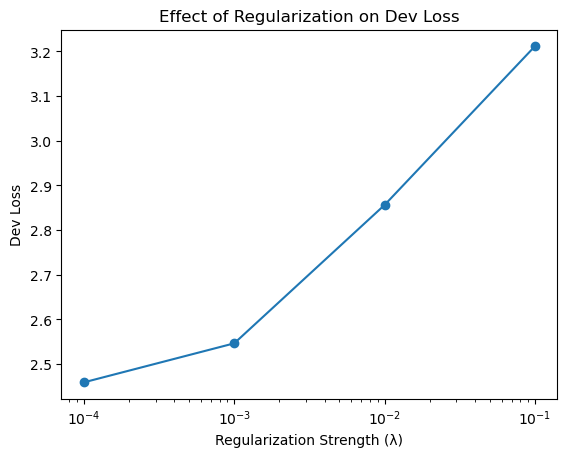

In [732]:
import matplotlib.pyplot as plt 
reg_lambdas, dev_losses = zip(*results)
plt.plot(reg_lambdas, dev_losses, marker='o')
plt.xscale('log')
plt.xlabel("Regularization Strength (λ)")
plt.ylabel("Dev Loss")
plt.title("Effect of Regularization on Dev Loss")
plt.show()

In [737]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn((27, 27), generator=g, requires_grad=True) * 0.01 # tuning
reg_strengths = [0.0001] 
results = []
for reg_lambda in reg_strengths:
    W = torch.randn((27, 27), generator=g, requires_grad=True)  # Reinitialize W

    for k in range(1000):  # Training loop
        xenc = F.one_hot(X_train, num_classes=27).float().max(dim=1)[0]
        logits = xenc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdims=True)

        loss = -probs[torch.arange(X_train.shape[0]), y_train].log().mean() + reg_lambda * (W**2).sum()
        print(loss)

        W.grad = None
        loss.backward()
        W.data += -6 * W.grad

    # Compute final loss on dev set
    xenc_dev = F.one_hot(X_dev, num_classes=27).float().max(dim=1)[0]
    logits_dev = xenc_dev @ W
    counts_dev = logits_dev.exp()
    probs_dev = counts_dev / counts_dev.sum(1, keepdims=True)
    dev_loss = -probs_dev[torch.arange(X_dev.shape[0]), y_dev].log().mean().item()

    results.append((reg_lambda, dev_loss))
    print(f"Reg: {reg_lambda}, Dev Loss: {dev_loss}")

tensor(4.0890, grad_fn=<AddBackward0>)
tensor(3.9444, grad_fn=<AddBackward0>)
tensor(3.8223, grad_fn=<AddBackward0>)
tensor(3.7170, grad_fn=<AddBackward0>)
tensor(3.6255, grad_fn=<AddBackward0>)
tensor(3.5453, grad_fn=<AddBackward0>)
tensor(3.4748, grad_fn=<AddBackward0>)
tensor(3.4126, grad_fn=<AddBackward0>)
tensor(3.3575, grad_fn=<AddBackward0>)
tensor(3.3083, grad_fn=<AddBackward0>)
tensor(3.2640, grad_fn=<AddBackward0>)
tensor(3.2239, grad_fn=<AddBackward0>)
tensor(3.1874, grad_fn=<AddBackward0>)
tensor(3.1540, grad_fn=<AddBackward0>)
tensor(3.1232, grad_fn=<AddBackward0>)
tensor(3.0948, grad_fn=<AddBackward0>)
tensor(3.0684, grad_fn=<AddBackward0>)
tensor(3.0439, grad_fn=<AddBackward0>)
tensor(3.0211, grad_fn=<AddBackward0>)
tensor(2.9999, grad_fn=<AddBackward0>)
tensor(2.9800, grad_fn=<AddBackward0>)
tensor(2.9614, grad_fn=<AddBackward0>)
tensor(2.9440, grad_fn=<AddBackward0>)
tensor(2.9276, grad_fn=<AddBackward0>)
tensor(2.9123, grad_fn=<AddBackward0>)
tensor(2.8979, grad_fn=<A

In [739]:
xenc = F.one_hot(X_test, num_classes=27).float().max(dim=1)[0] # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(X_test.shape[0]), y_test].log().mean()
test_error = loss.item()
print(test_error)

2.4657070636749268


**E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?**

In [742]:
xs, ys = [], []
for w in words: 
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        xs.append((ix1, ix2))
        ys.append(ix3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)



In [748]:
xs.shape, ys.shape

(torch.Size([237192, 2]), torch.Size([237192]))

In [752]:
# Initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27, 27), generator=g, requires_grad=True)



In [822]:
# Training loop
for k in range(100):
    logits = W[xs[:, 0], xs[:, 1]]  # Replace one-hot encoding
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(xs.shape[0]), ys].log().mean()

    print(loss.item())

    W.grad = None
    loss.backward()
    W.data += -30 * W.grad  # Adjusted learning rate for stability


2.1426122188568115
2.142608404159546
2.142604351043701
2.1426005363464355
2.142596483230591
2.142592668533325
2.1425886154174805
2.1425845623016357
2.14258074760437
2.1425766944885254
2.1425728797912598
2.142568826675415
2.1425647735595703
2.1425609588623047
2.142557144165039
2.1425530910491943
2.1425492763519287
2.142545223236084
2.1425411701202393
2.1425375938415527
2.142533540725708
2.1425294876098633
2.1425256729125977
2.142521619796753
2.1425178050994873
2.1425139904022217
2.142510175704956
2.1425061225891113
2.1425020694732666
2.14249849319458
2.1424942016601562
2.1424903869628906
2.142486572265625
2.1424827575683594
2.1424784660339355
2.142474889755249
2.1424708366394043
2.1424670219421387
2.142463207244873
2.1424591541290283
2.1424553394317627
2.142451524734497
2.1424477100372314
2.1424436569213867
2.142439603805542
2.1424360275268555
2.1424319744110107
2.142428159713745
2.1424243450164795
2.142420530319214
2.142416477203369
2.1424126625061035
2.142408609390259
2.14240479469299

In [824]:
train_error = 2.142228364944458

In [826]:
logits = W[X_dev[:, 0], X_dev[:, 1]]  # Replace one-hot encoding
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(X_dev.shape[0]), y_dev].log().mean()

print(loss.item())

2.1391844749450684


#### Prediction

In [847]:
# Finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647+24)

for i in range(5):  # Generate 5 words
    out = []
    ix1, ix2 = 0, 0  # Start with two dots (start tokens)

    while True:
        # Use indexing instead of one-hot encoding
        logits = W[ix1, ix2]  # Directly fetch logits from W

        # Convert logits to probabilities
        counts = logits.exp()
        p = counts / counts.sum()

        # Sample the next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()

        out.append(itos[ix])  # Convert index to character

        if ix == 0:  # Stop if end token is reached
            break

        # Shift indices: new pair is (previous ix2, new ix)
        ix1, ix2 = ix2, ix

    print(''.join(out))


odeperry.
zablalik.
rossa.
osim.
tereanja.
